<a href="https://colab.research.google.com/github/viniciusdutra314/LabIFSC/blob/master/monte_carlos_exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/viniciusdutra314/LabIFSC
from LabIFSC import*
import numpy as np
import matplotlib.pyplot as plt


## Probabilidade $[a,b]$

Usando N=10,000 a probabilidade estimada do valor estar entre 0.9 e 1.1 é de 68.98%
(1.0±0.1) 


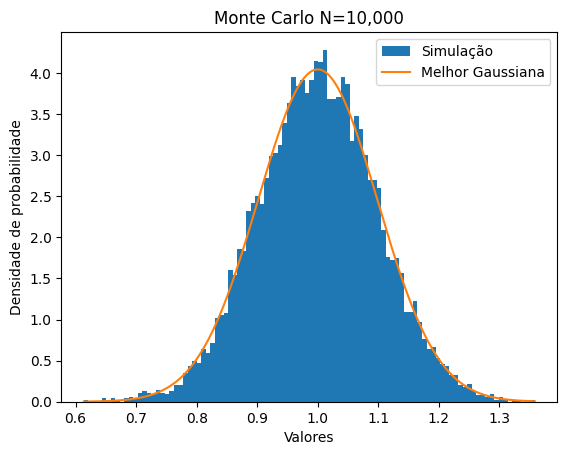

In [11]:
a=Medida((1,0.1),"")
print(montecarlo(lambda x:x,a,probabilidade=[0.9,1.1],hist=True))

## Casos em que os métodos são equivalentes

#### $$x+y$$

Esse é o resultado linear (35±6) kg
(35±5) kg


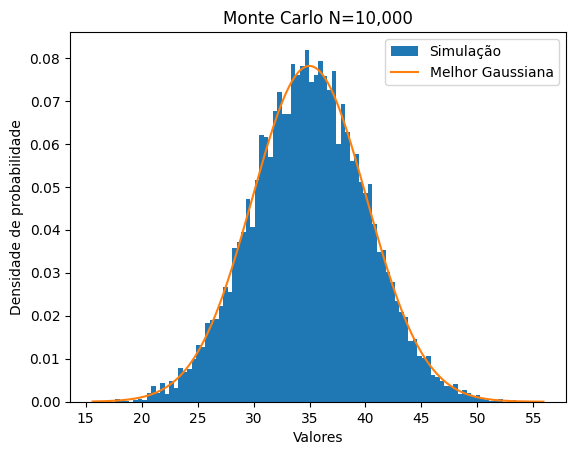

In [4]:
x=Medida((30,5),"kg")
y=Medida((5,1),"kg")
def soma(x,y): return x+y
print(montecarlo(soma,x,y,hist=True,comparar=True))

## $$x*y$$

Esse é o resultado linear (300±50) kg²
(300±40) kg²


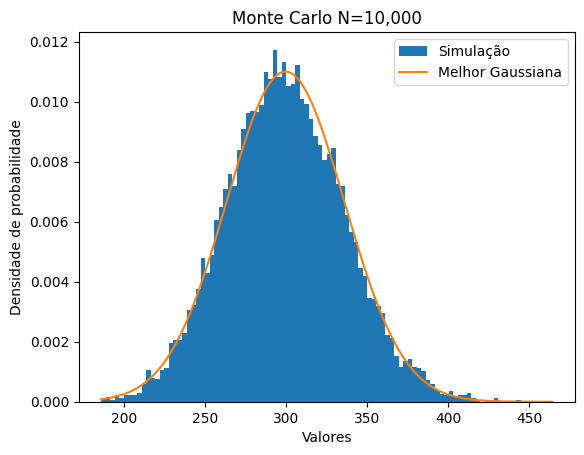

In [5]:
x=Medida((30,2),"kg")
y=Medida((10,1),"kg")
def multiplicacao(x,y): return x*y
print(montecarlo(multiplicacao,x,y,hist=True,comparar=True))

## *Casos que a aproximação linear não funciona*


#### Incertezas muito grandes $$f(A,\omega,\phi)=Asin(\omega+\phi)$$

Usando N=10,000 a probabilidade estimada do valor estar entre -0.5 e 0.5 é de 33.23%
Esse é o resultado linear (1±1) m
(0.0±0.7) m


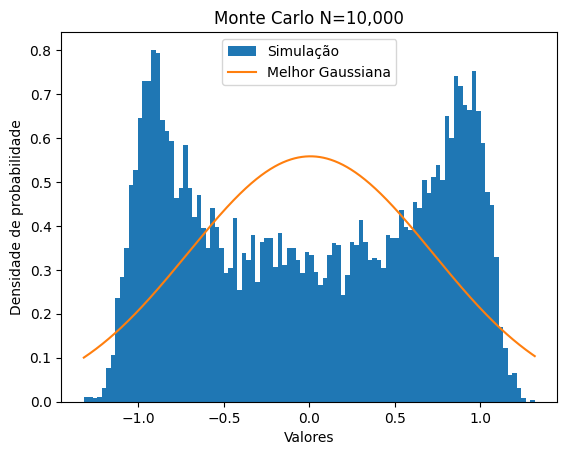

In [12]:
A=Medida((1,0.1),"m")
omega=Medida((2,3),"s^-1")
phi=Medida((0,0.1),"s")
print(montecarlo(lambda A,omega,phi: A*sin(omega+phi),A,omega,phi,hist=True,comparar=True,probabilidade=[-0.5,0.5]))

#### Exponenciais $$f(k,t)=e^{kt}$$

Função não é nativa do LabIFSC, logo a comparação não é possível
(2.8±0.6) 


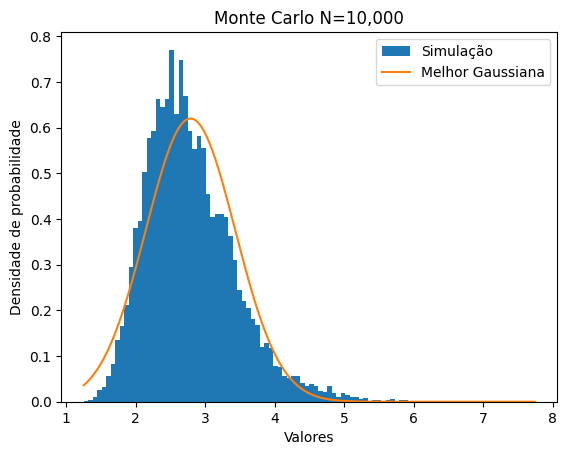

In [7]:
k=Medida((1,0.1),"s^-1")
t=Medida((1,0.2),"s")
print(montecarlo(lambda k,t: np.exp(k*t),k,t,hist=True,comparar=True))

$$f(x)=x^2e^xtan(x/10)*\Gamma(\sqrt{x})$$

Função não é nativa do LabIFSC, logo a comparação não é possível
(0.3±0.3) 


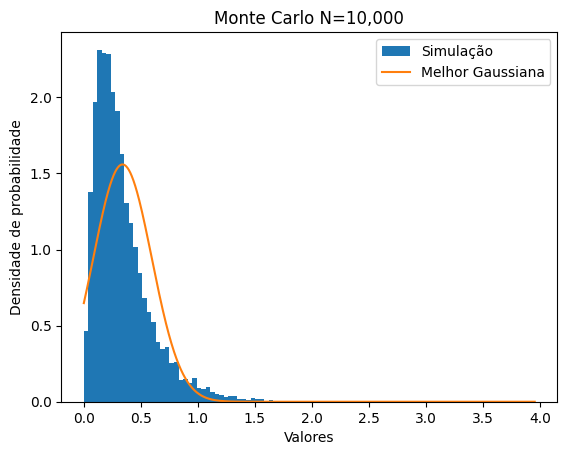

In [8]:
from math import gamma
def f(x): return (x**2)*np.exp(x)*np.tan(x/10)*gamma(x**(0.5))
x=Medida((1,0.2),"")
print(montecarlo(f,x,hist=True,comparar=True))

# Testes

In [9]:
#68-95-97 rule
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-1*0.1,1+1*0.1],N=int(1e4)))
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-2*0.1,1+2*0.1],N=int(1e4)))
print(montecarlo(lambda y: y, Medida((1,0.1),''),probabilidade=[1-3*0.1,1+3*0.1],N=int(1e4)))
#operações básicas
a=Medida((1,0.1),"")
b=Medida((2,0.05),"")
assert montecarlo(lambda x,y: x+y,a,b)==a+b
assert montecarlo(lambda x,y: x-y,a,b)==a-b
assert montecarlo(lambda x,y: x*y,a,b)==a*b
assert montecarlo(lambda x,y: x/y,a,b)==a/b
#funções LabIFSC
m1=Medida((20,1.5),"")
assert montecarlo(lambda x: cos(m1),m1)==cos(m1)
assert montecarlo(lambda x: sin(m1),m1)==sin(m1)
assert montecarlo(lambda x: tan(m1),m1)==tan(m1)
assert montecarlo(lambda x: cot(m1),m1)==cot(m1)
assert montecarlo(lambda x: sec(m1),m1)==sec(m1)
assert montecarlo(lambda x: csc(m1),m1)==csc(m1)
m1=Medida((0.4,0.01),"")
assert montecarlo(lambda x: arc_cos(m1),m1)==arc_cos(m1)
assert montecarlo(lambda x: arc_sin(m1),m1)==arc_sin(m1)
assert montecarlo(lambda x: arc_tan(m1),m1)==arc_tan(m1)
m1=Medida((1.2,0.01),"")
assert montecarlo(lambda x: ln(m1),m1)==ln(m1)
assert montecarlo(lambda x: log2(m1),m1)==log2(m1)
assert montecarlo(lambda x: log10(m1),m1)==log10(m1)
assert montecarlo(lambda x: sqrt(m1),m1)==sqrt(m1)


Usando N=10000 a probabilidade estimada do valor estar entre 0.9 e 1.1 é de 67.75%
(1.0±0.1) 
Usando N=10,000 a probabilidade estimada do valor estar entre 0.8 e 1.2 é de 95.45%
(1.0±0.1) 
Usando N=10,000 a probabilidade estimada do valor estar entre 0.7 e 1.3 é de 99.74%
(1.0±0.1) 
